<a href="https://colab.research.google.com/github/Khushi-0/LGMVIP-DataScience/blob/main/Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

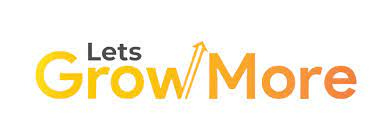

## LetsGrowMore Internship January-2023 Batch

**Author - Khushi Koladiya**

# **Iris Flower Classification using Machine Learning**

Dataset Link : (http://archive.ics.uci.edu/ml/datasets/Iris)

# Steps To Classify Iris Flower:

# 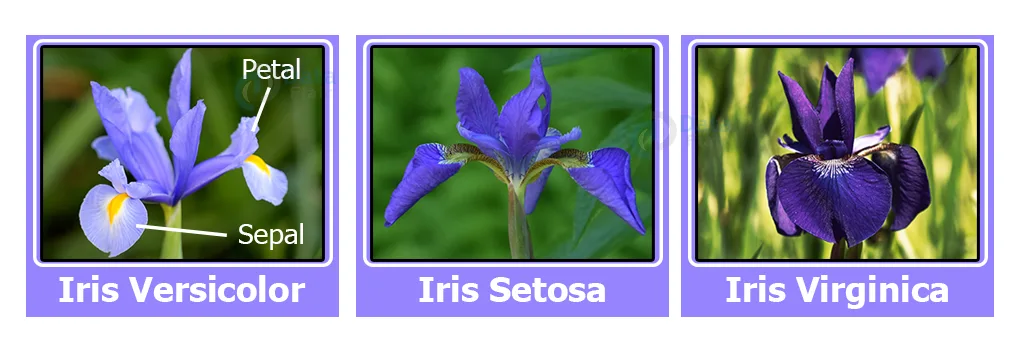


1. Load the Data
2. Analyze and Visualize the Dataset
3. Model Training
4. Model Evaluation
5. Testing the Model

# **Step 1 - Load the Data**

In [1]:
# DataFlair Iris Flower Classification
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

*   Numpy will be used for any computational operations.
*   Matplotlib and Seaborn are used for data visualization.
*   Pandas help to load data from various sources like local storage, database, excel file, CSV file, etc.






In [6]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels'] 
# Load the data
df = pd.read_csv('/content/drive/MyDrive/iris.data', names=columns)
df.head(10)

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


*   Pd.read_csv reads CSV files.
*   df.head(10) shows the first 10 rows from the data set table.
*   All the numerical values are in centimeters.




# **Step 2 - Analyze and Visualize the dataset**

In [7]:
# Some basic statistical analysis about the data
df.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


From this description, we can see all the descriptions about the data, like average length and width, minimum value, maximum value, the 25%, 50%, and 75% distribution value, etc.

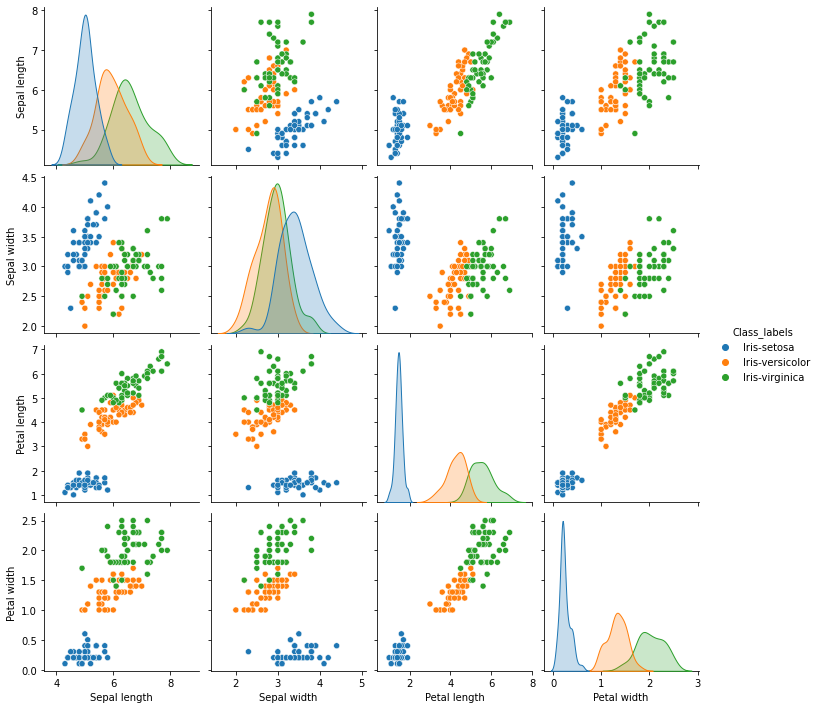

In [8]:
# Visualize the whole dataset
sns.pairplot(df, hue='Class_labels')

*   From this visualization, we can tell that iris-setosa is well separated from the other two flowers.
*   And iris virginica is the longest flower and iris setosa is the shortest.





In [9]:
# Separate features and target  
data = df.values
X = data[:,0:4]
y = data[:,4]

In [10]:
# Calculate average of each features for all classes
y_Data = np.array([np.average(X[:, i][y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(y))])
y_Data_reshaped = y_Data.reshape(4, 3)
y_Data_reshaped = np.swapaxes(y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

*   Np.average calculates the average from an array.
*   Here we used two for loops inside a list. This is known as list comprehension.
*   The Y_Data is a 1D array, but we have 4 features for every 3 classes. So we reshaped Y_Data to a (4, 3) shaped array.
*   Then we change the axis of the reshaped matrix






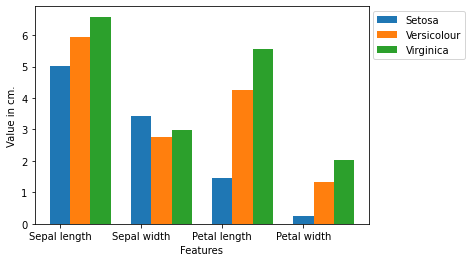

In [12]:
# Plot the average
plt.bar(X_axis, y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

# **Step 3 - Model Training**

In [13]:
# Split the data to train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

*   Using train_test_split we split the whole data into training and testing datasets. 




In [14]:
# Support vector machine algorithm
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

*   Here we imported a support vector classifier from the scikit-learn support vector machine.
*   Then, we created an object and named it svn.
*   After that, we feed the training dataset into the algorithm by using the svn.fit() method.






# **Step 4 - Model Evaluation**

In [15]:
# Predict from the test dataset
predictions = svn.predict(X_test)
# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9666666666666667

*   accuracy_score() takes true values and predicted values and returns the percentage of accuracy
*   Here, the accuracy is above 96%.







In [18]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



*   Precision defines the ratio of true positives to the sum of true positive and false positives.
*   Recall defines the ratio of true positive to the sum of true positive and false negative.
*   F1-score is the mean of precision and recall value.
*   Support is the number of actual occurrences of the class in the specified dataset.



# **Step 5 - Testing the Model**

In [19]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


*   It looks like the model is predicting correctly because the setosa is shortest and virginica is the longest and versicolor is in between these two.




In [20]:
# Save the model
import pickle
with open('SVM.pickle', 'wb') as f:
    pickle.dump(svn, f)
# Load the model
with open('SVM.pickle', 'rb') as f:
    model = pickle.load(f)
model.predict(X_new)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

We can save the model using pickle format.
And again we can load the model in any other program using pickle and use it using model.predict to predict the iris data.

# **Summary**

In this project, we learned to train our own supervised machine learning model using Iris Flower Classification Project with Machine Learning. Through this project, we learned about machine learning, data analysis, data visualization, model creation, etc.